# Classification model using KNN

### 1. Import libraries

In [17]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [18]:
path ="../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,428,429,430,431,432,433,434,435,436,437
0,1,-0.315205,-0.407536,0.531673,0.808408,-0.810542,0.193779,0.034024,-0.164311,0.014579,...,0.646639,-0.484226,0.024023,0.428195,-0.997664,-0.198929,0.558472,-0.711090,-0.625051,1.313173
1,0,-0.399706,-0.359715,0.589118,0.689009,-0.934274,0.590328,0.000470,-0.579490,-0.014040,...,0.367153,-0.127431,0.453080,0.222101,0.063686,-0.350376,0.585483,-0.723964,-0.614908,1.041820
2,2,-0.257777,0.017325,-0.369965,0.256681,-0.647283,-0.009628,0.178241,0.039518,-0.395371,...,-0.180099,0.149861,0.336687,0.759315,-0.011072,0.195970,0.454717,0.462148,-0.548280,0.754466
3,0,0.193269,-0.121839,-0.275106,0.063980,-0.259090,-0.195940,0.075242,0.029794,0.122252,...,0.021265,0.002938,0.010013,0.112763,0.223452,-0.481063,0.166170,0.020349,-0.113602,-0.069602
4,2,-0.054664,-0.326593,-0.267536,0.490474,-0.725889,-0.157597,0.261997,0.182627,-0.072347,...,0.146497,-0.214596,0.316881,0.412167,0.322099,-0.438647,0.382818,-0.143397,-0.469160,0.382200


In [19]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0   -0.315205 -0.407536  0.531673  0.808408 -0.810542  0.193779  0.034024   
1   -0.399706 -0.359715  0.589118  0.689009 -0.934274  0.590328  0.000470   
2   -0.257777  0.017325 -0.369965  0.256681 -0.647283 -0.009628  0.178241   
3    0.193269 -0.121839 -0.275106  0.063980 -0.259090 -0.195940  0.075242   
4   -0.054664 -0.326593 -0.267536  0.490474 -0.725889 -0.157597  0.261997   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.015191 -0.250067 -0.247737  0.428315 -0.673884 -0.122022  0.161610   
177  0.025750 -0.248474 -0.427581  0.390085 -0.543150 -0.102631  0.184679   
178 -0.380961 -0.304403  0.498039  0.549402  0.040175  0.282321 -0.007317   
179 -0.394782 -0.050161  0.336075  0.524383 -0.065044  0.317751 -0.014208   
180 -0.000122 -0.274288 -0.315658  0.305076 -0.167984 -0.064459  0.178613   

            7         8         9  ...       428       429       430  \
0  

### 3. Train-Test dataset split

In [20]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125,stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [21]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 7 and is: 0.4054


C:\Users\sandr\AppData\Local\Temp/ipykernel_11604/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_11604/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


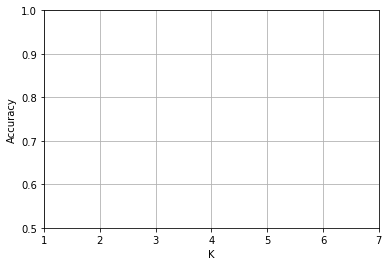

In [22]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [23]:
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x000002412805C280>,
                     n_neighbors=7)

In [24]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,0,0
2,0,2,2
3,2,0,0
4,0,2,2


In [25]:
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))

Best result of the cross validation of the model (euclidean) with the best paramters:0.36847290640394087
Best result of the cross validation of the model (manhattan) with the best paramters:0.38226600985221676


#### 6.1. Manhattan model

In [26]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [27]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [28]:
print('Precisión final en el conjunto de datos de entrenamiento (manhattan): ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba (manhattan): ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento (manhattan): 0.5555555555555556
Precisión final en el conjunto de datos de prueba (manhattan): 0.43243243243243246


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[56  1 10]
 [16  1  8]
 [26  3 23]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [2 0 0 0 2 2 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 2 0 2 2
 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 2 2 2 2 0 0
 0 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 2
 0 0 2 0 0 0 0 2 1 0 2 1 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0]


In [30]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68        67
           1       0.20      0.04      0.07        25
           2       0.56      0.44      0.49        52

    accuracy                           0.56       144
   macro avg       0.44      0.44      0.41       144
weighted avg       0.50      0.56      0.51       144



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[12  0  6]
 [ 5  0  1]
 [ 9  0  4]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 0 2 0 2 2 0 0 0 2 2 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 2 0 2 2 0 0 0 0 0 0 0]


In [32]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.46      0.67      0.55        18
           1       0.00      0.00      0.00         6
           2       0.36      0.31      0.33        13

    accuracy                           0.43        37
   macro avg       0.28      0.32      0.29        37
weighted avg       0.35      0.43      0.38        37



C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: Unde